In [16]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd

## Loading Dataset

In [17]:
#Loading the Dataframe from Feature_Extraction.ipynb
Data_ohe = pd.read_pickle("Data_ohe.pkl")
Data_tar_enc = pd.read_pickle("Data_tar_enc.pkl")
Attack_type = pd.read_pickle("Attack_type.pkl")

print(f"Data_ohe shape; ", Data_ohe.shape) 
print(f"Data_tar_enc shape; ", Data_tar_enc.shape) 

Data_ohe shape;  (157800, 56)
Data_tar_enc shape;  (157800, 37)


## Distribution of the Dataset

### One Hot Encoded Dataset

The mean of the Features tells us where the peak of the distribution is.<br>
The standard deviation of the Features tells us how much the values of the Features scattered from the mean.<br> 

In [18]:
di = {'Max':Data_ohe[list].max(), 'Min': Data_ohe[list].min(),
     'Mean':Data_ohe[list].mean(), 'Std':Data_ohe[list].std()} # dict
Dataset_dist = pd.DataFrame(data= di) # Dataframe
print(Dataset_dist.sort_values(by=['Std'])) # sorting according to std and printing 

                                                             Max  Min  \
dns.retransmit_request                              1.000000e+00  0.0   
http.request.version_-a HTTP/1.1                    1.000000e+00  0.0   
http.request.version_/etc/passwd|?data=Download...  1.000000e+00  0.0   
http.request.method_OPTIONS                         1.000000e+00  0.0   
http.request.version_By Dr HTTP/1.1                 1.000000e+00  0.0   
dns.qry.name.len__googlecast._tcp.local             1.000000e+00  0.0   
http.request.version_Src=javascript:alert('Vuln...  1.000000e+00  0.0   
dns.qry.name.len_2.debian.pool.ntp.org              1.000000e+00  0.0   
dns.qry.name.len_3.debian.pool.ntp.org              1.000000e+00  0.0   
dns.qry.name.len_0.debian.pool.ntp.org              1.000000e+00  0.0   
dns.qry.name.len_1.debian.pool.ntp.org              1.000000e+00  0.0   
http.referer_() { _; } >_[$($())] { echo 93e4r0...  1.000000e+00  0.0   
dns.qry.name.len_1.0                               

Kurtosis value tells us how the distribution close to Gaussian/Normal distribution is.<br>
if kurtosis value almost = 3 then it is Gaussian. <br>
the more higher the value from 3 the more outlier in distribution => sharp peak and fat tails <br>
the lower the value from 3 the lower the occurence of outliers => uniform distribution => thin tails not peak <br>

In [19]:
print(Data_ohe.kurt()) 

http.request.method_0.0                                                                  16.977206
http.request.method_GET                                                                  18.681714
http.request.method_OPTIONS                                                          157800.000000
http.request.method_POST                                                                586.031538
http.request.method_TRACE                                                               621.211797
http.referer_() { _; } >_[$($())] { echo 93e4r0-CVE-2014-6278: true; echo;echo; }      4147.763281
http.referer_0.0                                                                        539.156894
http.referer_127.0.0.1                                                                  621.211797
http.request.version_-a HTTP/1.1                                                     157800.000000
http.request.version_/etc/passwd|?data=Download HTTP/1.1                             157800.000000
http.reque

c:\Users\haris\anaconda3\envs\Bachelorarbeit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\haris\anaconda3\envs\Bachelorarbeit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0.98, 'Example: Left(kurt = -1.312754) : Right(Kurt = 21344.327902)')

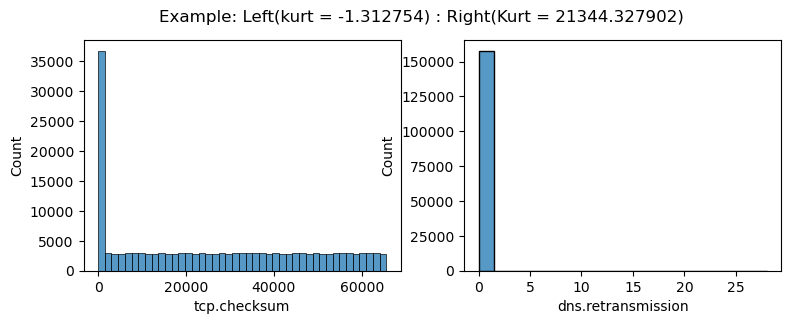

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(9, 3))
sns.histplot(data=Data_ohe['tcp.checksum'], ax=axs[0])
sns.histplot(data=Data_ohe['dns.retransmission'], ax=axs[1])
fig.suptitle('Example: Left(kurt = -1.312754) : Right(Kurt = 21344.327902)')

### Target encoded Dataset

In [21]:
di_t = {'Max':Data_tar_enc[list].max(), 'Min': Data_tar_enc[list].min(),
     'Mean':Data_tar_enc[list].mean(), 'Std':Data_tar_enc[list].std()} # dict
Dataset_dist_t = pd.DataFrame(data= di_t) # Dataframe
print(Dataset_dist_t.sort_values(by=['Std'])) # sorting according to std and printing 

                                 Max       Min          Mean           Std
dns.retransmit_request  1.000000e+00  0.000000  6.337136e-06  2.517367e-03
http.referer            1.000000e+00  0.845708  8.460013e-01  6.607905e-03
dns.qry.name.len        1.000000e+00  0.000000  8.460066e-01  1.269322e-02
http.request.version    1.000000e+00  0.838597  8.459984e-01  3.365577e-02
http.request.method     1.000000e+00  0.838597  8.460003e-01  3.366024e-02
mqtt.conack.flags       8.530816e-01  0.000000  8.460013e-01  7.677622e-02
mqtt.conflag.cleansess  1.000000e+00  0.000000  7.921420e-03  8.864942e-02
arp.opcode              2.000000e+00  0.000000  1.419518e-02  1.497828e-01
tcp.connection.synack   1.000000e+00  0.000000  2.994930e-02  1.704480e-01
mqtt.conflags           2.000000e+00  0.000000  1.584284e-02  1.772988e-01
dns.retransmission      2.800000e+01  0.000000  1.451204e-03  1.892669e-01
http.response           1.000000e+00  0.000000  4.574778e-02  2.089383e-01
tcp.connection.fin      1

In [22]:
print(Data_ohe.kurt().sort_values()) 

tcp.flags.ack                                                                            -1.684242
tcp.flags                                                                                -1.527492
tcp.checksum                                                                             -1.312754
tcp.ack_raw                                                                              -0.935133
Attack_label                                                                              1.675682
tcp.connection.syn                                                                        2.968287
tcp.connection.rst                                                                        5.728949
tcp.connection.fin                                                                       12.261069
icmp.seq_le                                                                              13.296843
icmp.checksum                                                                            14.725320
udp.stream

c:\Users\haris\anaconda3\envs\Bachelorarbeit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\haris\anaconda3\envs\Bachelorarbeit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0.98, 'Example: Left(kurt = -1.312754) : Right(Kurt = 21344.327902)')

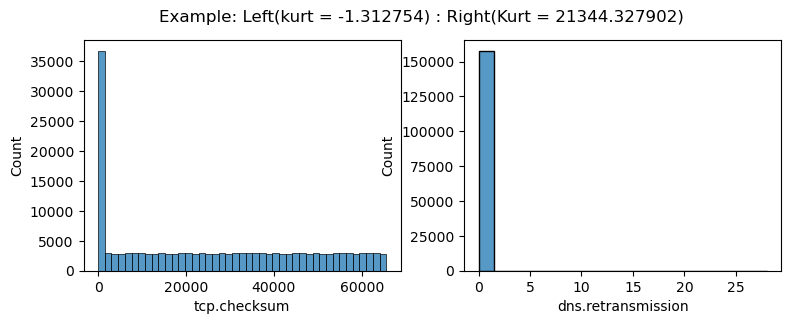

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(9, 3))
sns.histplot(data=Data_tar_enc['tcp.checksum'], ax=axs[0])
sns.histplot(data=Data_tar_enc['dns.retransmission'], ax=axs[1])
fig.suptitle('Example: Left(kurt = -1.312754) : Right(Kurt = 21344.327902)')

***

## Feature Scaling
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-power-transformer-section

In [24]:
# help variable
list_c = Data_ohe.columns
list_c_t = Data_tar_enc.columns

In [25]:
# Help Function
def draw_scaled_plot(df_arg, str_arg):
    fig, axs = plt.subplots(1, 2, figsize=(9, 3))
    sns.histplot(data= df_arg['tcp.checksum'], ax=axs[0])
    sns.histplot(data= df_arg['dns.retransmission'], ax=axs[1])
    fig.suptitle("Example: " + str_arg)
    return axs

### Standardisation
When distribution of data almost follows normal distribution (otherwise called gaussian)<br>
Sensitive to outliers.

In [26]:
from sklearn.preprocessing import StandardScaler # Standardisation
scaler_std = StandardScaler() # setting standardisation estimator

c:\Users\haris\anaconda3\envs\Bachelorarbeit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\haris\anaconda3\envs\Bachelorarbeit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


array([<Axes: xlabel='tcp.checksum', ylabel='Count'>,
       <Axes: xlabel='dns.retransmission', ylabel='Count'>], dtype=object)

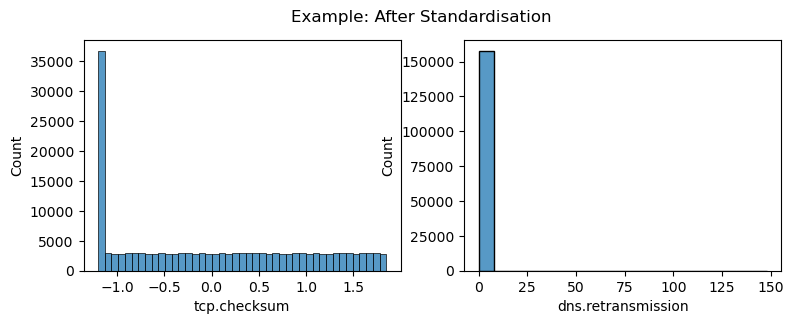

In [27]:
# OHE
std_array = scaler_std.fit_transform(Data_ohe) # transformation using std_estimator
Dataset_std = pd.DataFrame(data= std_array, columns= list_c)
Dataset_std.to_pickle("Data_ohe_std.pkl") # saving in pickle file
draw_scaled_plot(Dataset_std, "After Standardisation")

c:\Users\haris\anaconda3\envs\Bachelorarbeit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\haris\anaconda3\envs\Bachelorarbeit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


array([<Axes: xlabel='tcp.checksum', ylabel='Count'>,
       <Axes: xlabel='dns.retransmission', ylabel='Count'>], dtype=object)

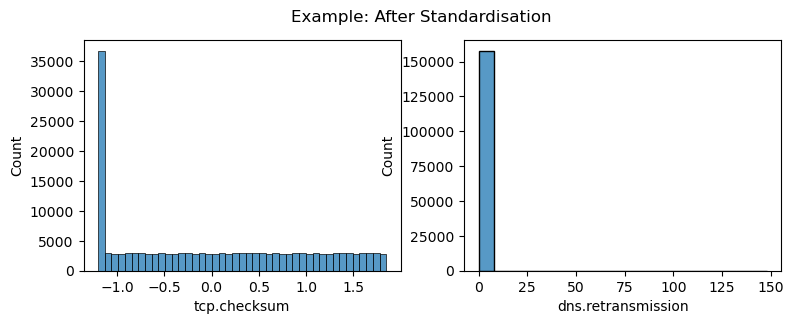

In [28]:
# Target Encoded
std_array = scaler_std.fit_transform(Data_tar_enc) # transformation using std_estimator
Dataset_std = pd.DataFrame(data= std_array, columns= list_c_t)
Dataset_std.to_pickle("Data_te_std.pkl") # saving in pickle file
draw_scaled_plot(Dataset_std, "After Standardisation")

### Normalisation
When the distribution of the data is unknown or it is not Gaussian, Normalisation is appropriate.<br>
Not Sensitive to outliers. 

In [29]:
from sklearn.preprocessing import normalize # Normalisation

In [30]:
# OHE
norm_array = normalize(Data_ohe, norm="l2")  # L2 normalization each row independently
Dataset_norm = pd.DataFrame(data=norm_array, columns=list_c)
Dataset_norm.to_pickle("Data_ohe_norm.pkl") # saving in pickle file

c:\Users\haris\anaconda3\envs\Bachelorarbeit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\haris\anaconda3\envs\Bachelorarbeit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0.98, 'Example: After Normalisation')

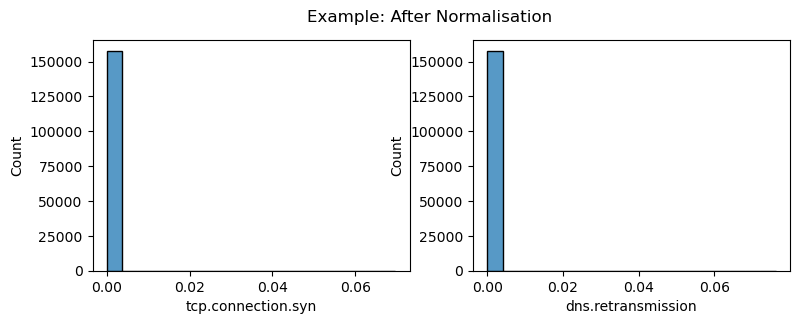

In [11]:
fig3, axs3 = plt.subplots(1, 2, figsize=(9, 3))
sns.histplot(data=Dataset_norm['tcp.connection.syn'], ax=axs3[0]) # 'tcp.checksum' is not visible because too small x-axis values.
#sns.histplot(data=Dataset_norm['tcp.checksum'], ax=axs3[0])
sns.histplot(data=Dataset_norm['dns.retransmission'], ax=axs3[1])
fig3.suptitle('Example: After Normalisation')

### Power transformation
To stabilize variance and minimize skewness.<br>
By default applies zero-mean, unit variance normalization.

In [13]:
from sklearn.preprocessing import PowerTransformer # Powertransformation
scaler_powt = PowerTransformer()

c:\Users\haris\anaconda3\envs\Bachelorarbeit\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\haris\anaconda3\envs\Bachelorarbeit\Lib\site-packages\numpy\core\_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
c:\Users\haris\anaconda3\envs\Bachelorarbeit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\haris\anaconda3\envs\Bachelorarbeit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


array([<Axes: xlabel='tcp.checksum', ylabel='Count'>,
       <Axes: xlabel='dns.retransmission', ylabel='Count'>], dtype=object)

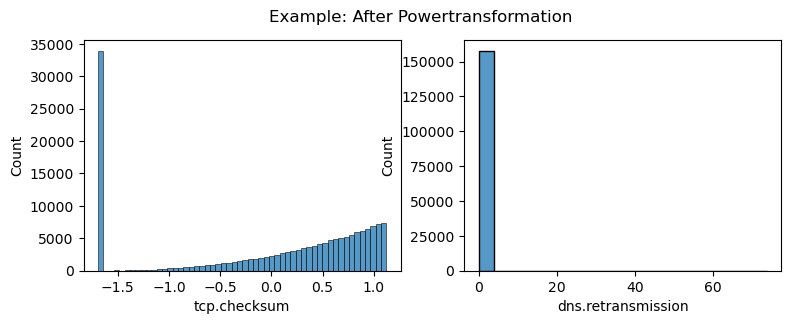

In [14]:
# OHE
powt_array = scaler_powt.fit_transform(Data_ohe)  
Dataset_powt = pd.DataFrame(data=powt_array, columns=list_c)
draw_scaled_plot(Dataset_powt, "After Powertransformation")

c:\Users\haris\anaconda3\envs\Bachelorarbeit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\haris\anaconda3\envs\Bachelorarbeit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


array([<Axes: xlabel='tcp.checksum', ylabel='Count'>,
       <Axes: xlabel='dns.retransmission', ylabel='Count'>], dtype=object)

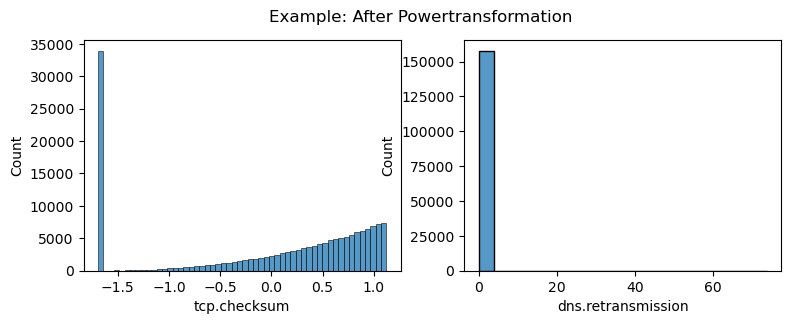

In [15]:
# Target Encoded
powt_array = scaler_powt.fit_transform(Data_tar_enc)  
Dataset_powt = pd.DataFrame(data=powt_array, columns=list_c_t)
draw_scaled_plot(Dataset_powt, "After Powertransformation")

### Quantile Tranformation / Nonlinear Transformation
Probability density function of each feature will be mapped to a uniform or Gaussian distribution.<br>
Makes outliers indistinguishable from inliers.

In [8]:
from sklearn.preprocessing import QuantileTransformer # Quantiletransformation
scaler_quant = QuantileTransformer(output_distribution= "normal") # Estimator

c:\Users\haris\anaconda3\envs\Bachelorarbeit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\haris\anaconda3\envs\Bachelorarbeit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


array([<Axes: xlabel='tcp.checksum', ylabel='Count'>,
       <Axes: xlabel='dns.retransmission', ylabel='Count'>], dtype=object)

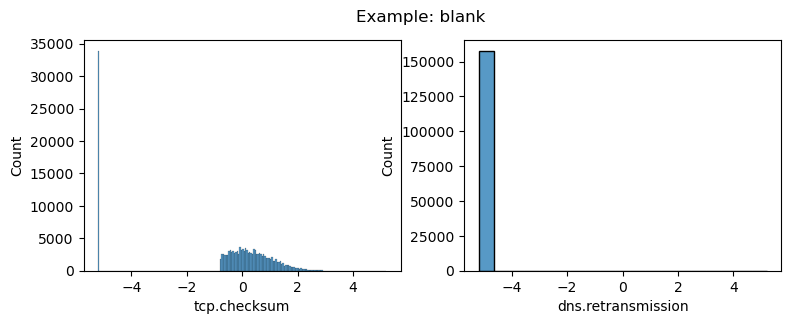

In [9]:
# OHE
quant_array = scaler_quant.fit_transform(Data_ohe)  
Dataset_quant = pd.DataFrame(data=quant_array, columns=list_c)
draw_scaled_plot(Dataset_quant, "After Quantiletransformation")

c:\Users\haris\anaconda3\envs\Bachelorarbeit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\haris\anaconda3\envs\Bachelorarbeit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


array([<Axes: xlabel='tcp.checksum', ylabel='Count'>,
       <Axes: xlabel='dns.retransmission', ylabel='Count'>], dtype=object)

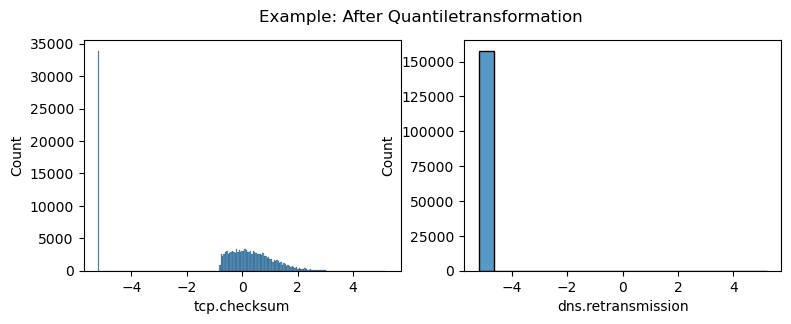

In [11]:
# Target Encoded
quant_array = scaler_quant.fit_transform(Data_tar_enc)  
Dataset_quant = pd.DataFrame(data=quant_array, columns=list_c_t)
draw_scaled_plot(Dataset_quant, "After Quantiletransformation")

***

## Conclusion

From the Dict-Table (Mean, Max, min, std) it is evident that the Features of the Datasets have huge range of values<br>
and some of them are hugely concentrated in one value (higher standard variance and higher Kurtosis). Hence the<br>
the Feature scaling is important. <br>
The Distribution of Features, that are present both in One-Hot Encoded Dataframe and Target Encoded Dataframe<br>
are same. It does makes sense because all the Normalisation/Standardisation techniques is only that particular<br>
column/series dependent. <br>
**Since the standardisation is outlier sensitive the Normalisation approach would be suggestive.**

"Data_ohe_std.pkl" => Dataset Onehot encoded and standardised<br>
"Data_te_std.pkl"  => Dataset Target encoded and standardised<br>
"Data_ohe_norm.pkl" => Dataset Onehot encoded and normalised<br>